# Question-1

## Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2)]


In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
w1 = np.array([[1, 6], [3, 4], [3, 8], [5, 6]])
w2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])

In [74]:
#Calculating covarience matrices

def mean(w1):
    N = len(w1)

    mean_w1 = []
    for i in range(2):
        sum=0
        for j in range(N):
            sum += w1[j][i]
        mean_w1.append([sum/N])

    mean_w1 = np.array(mean_w1)

    return mean_w1


def cov_mat(w1):
    N = len(w1)

    mean_w1 = []
    for i in range(2):
        sum=0
        for j in range(N):
            sum += w1[j][i]
        mean_w1.append([sum/N])

    mean_w1 = np.array(mean_w1)

    
    Z_1 = []

    for i in range(N):
        row = []
        for j in range(2):
            temp = w1[i][j] - mean_w1[j]
            row.append(temp[0])
        Z_1.append(row)

    Z_1 = np.array(Z_1)
    cov_1 = (1/(N-1)) * np.linalg.matmul(Z_1.T, Z_1)
    return cov_1


In [75]:
cov1 = cov_mat(w1)
cov2 = cov_mat(w2)

cov2

array([[2.66666667, 0.        ],
       [0.        , 2.66666667]])

In [76]:
# cov1 = cov2. First Case
#gi(x) = wi.T*x + wi0

sig2 = cov1[0][0]

mean_w1 = mean(w1)
mean_w2 = mean(w2)

weight1 = (1/sig2) * mean_w1
weight2 = (1/sig2) * mean_w2

w10 = ((-1 / (2*sig2)) * np.linalg.matmul(mean_w1.T, mean_w1)) + np.log(0.5)
w20 = ((-1 / (2*sig2)) * np.linalg.matmul(mean_w2.T, mean_w2)) + np.log(0.5)

In [77]:
weight1

array([[1.125],
       [2.25 ]])

In [78]:
weight2

array([[ 1.125],
       [-0.75 ]])

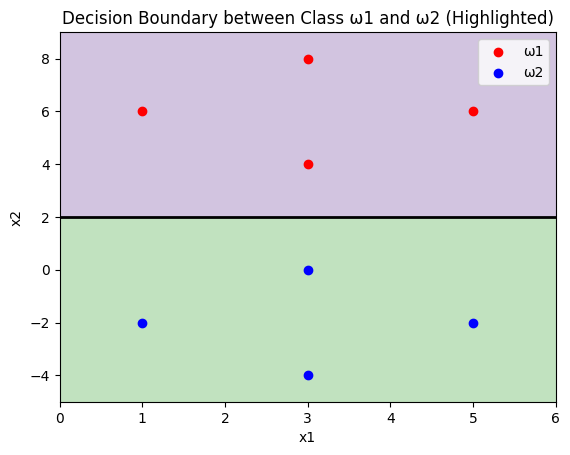

In [79]:
def g1(x):
    return np.dot(weight1.T, x) + w10

def g2(x):
    return np.dot(weight2.T, x) + w20

X = np.vstack((w1, w2))
# Define grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Calculate the decision boundary g1(x) = g2(x)
Z = np.array([g1([xx_val, yy_val]) - g2([xx_val, yy_val]) for xx_val, yy_val in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, levels=[-1000, 0, 1000], alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(w1[:, 0], w1[:, 1], color='red', label='ω1')
plt.scatter(w2[:, 0], w2[:, 1], color='blue', label='ω2')

# Highlight the decision boundary (where g1(x) = g2(x))
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.legend()
plt.title('Decision Boundary between Class ω1 and ω2 (Highlighted)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Question 2

### Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) =0.3; P(ω2)=0.7### 
ω1 =([1,-1; 2,-5; 3,-6; 4,-10; 5,-12; 6,-1)

- ]### 
ω2 ( [-1,1; -2,5; -3,6; -4,10, -5,12; -6, )5]


In [80]:
w1 = np.array([[1, -1], [2, -5], [3, -6], [4, -10], [5, -12], [6, -5]])
w2 = np.array([[-1, 1], [-2, 5], [-3, 6], [-4, 10], [-5, 12], [-6, 15]])

In [81]:
mean_w1 = mean(w1)
mean_w2 = mean(w2)

cov1 = cov_mat(w1)
cov2 = cov_mat(w2)

In [82]:
print(cov1)
print(cov2)

[[ 3.5 -4.5]
 [-4.5 15.5]]
[[ 3.5        -9.5       ]
 [-9.5        26.16666667]]


In [83]:
#Case 2

weight_1 = (np.linalg.inv(cov1)) * mean_w1
weight_2 = (np.linalg.inv(cov2)) * mean_w2


w10 = ((-1/2) * np.dot(np.dot(mean_w1.T, np.linalg.inv(cov1)), mean_w1)) + np.log(0.3)
w20 = ((-1/2) * np.dot(np.dot(mean_w2.T, np.linalg.inv(cov2)), mean_w2)) + np.log(0.7)

weight1.shape

(2, 1)

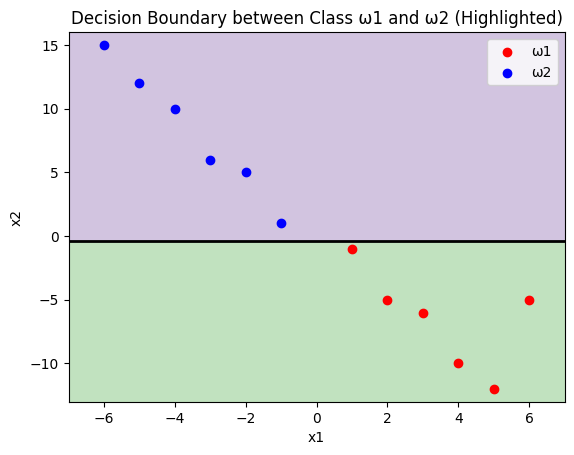

In [84]:
X = np.vstack((w1, w2))
# Define grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Calculate the decision boundary g1(x) = g2(x)
Z = np.array([g1([xx_val, yy_val]) - g2([xx_val, yy_val]) for xx_val, yy_val in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, levels=[-1000, 0, 1000], alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(w1[:, 0], w1[:, 1], color='red', label='ω1')
plt.scatter(w2[:, 0], w2[:, 1], color='blue', label='ω2')

# Highlight the decision boundary (where g1(x) = g2(x))
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.legend()
plt.title('Decision Boundary between Class ω1 and ω2 (Highlighted)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Question 3

In [85]:
w1 = np.array([[2, 6], [3, 4], [3, 8], [4, 6]])
w2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])

In [86]:
mean_w1 = mean(w1)
mean_w2 = mean(w2)

cov1 = cov_mat(w1)
cov2 = cov_mat(w2)

In [87]:
cov1

array([[0.66666667, 0.        ],
       [0.        , 2.66666667]])

In [88]:
cov2

array([[2.66666667, 0.        ],
       [0.        , 2.66666667]])

In [89]:
#Case 3
W_1 = (-1/2) * np.linalg.inv(cov1)
W_2 = (-1/2) * np.linalg.inv(cov2)

weight1 = np.dot(np.linalg.inv(cov1), mean_w1)
weight2 = np.dot(np.linalg.inv(cov2), mean_w2)

w10 = ((-1/2) * np.dot(np.dot(mean_w1.T, np.linalg.inv(cov1)), mean_w1)) - (1/2)*np.log(abs(np.linalg.det(cov1)))+ np.log(0.5)
w20 = ((-1/2) * np.dot(np.dot(mean_w2.T, np.linalg.inv(cov2)), mean_w2)) - (1/2)*np.log(abs(np.linalg.det(cov2)))+ np.log(0.5)

In [90]:
def g1(x):
    return np.dot(np.dot(np.array(x).T, W_1), x) + np.dot(weight1.T, x) + w10

def g2(x):
    return np.dot(np.dot(np.array(x).T, W_2), x) + np.dot(weight2.T, x) + w20

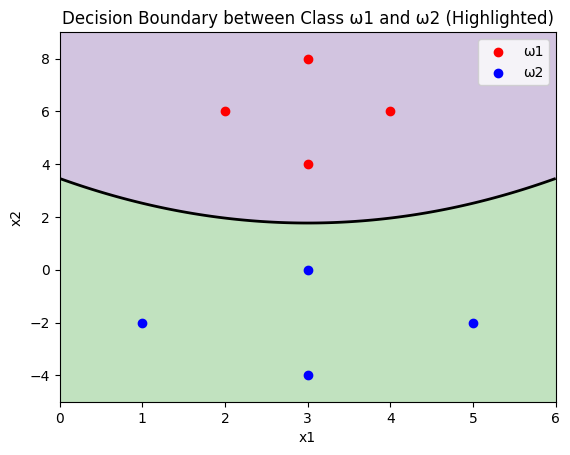

In [91]:
X = np.vstack((w1, w2))
# Define grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Calculate the decision boundary g1(x) = g2(x)
Z = np.array([g1([xx_val, yy_val]) - g2([xx_val, yy_val]) for xx_val, yy_val in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, levels=[-1000, 0, 1000], alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(w1[:, 0], w1[:, 1], color='red', label='ω1')
plt.scatter(w2[:, 0], w2[:, 1], color='blue', label='ω2')

# Highlight the decision boundary (where g1(x) = g2(x))
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.legend()
plt.title('Decision Boundary between Class ω1 and ω2 (Highlighted)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()